<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# julian_project_1: Standardized Test Analysis Notebook

WHO:

I've been hired by a popular college blogging website to analyze if laws, grants and or political motivations that vary state to state may be affecting SAT/ACT participation rates

## Problem Statement


Does wide dispersion exist between state’s SAT/ ACT participation rates?

Inital Hypothesis:

Data is skewed by external factors not related to SAT/ACT preference by state/student

Political, Budget, Regulatory factors?

At public insitutions in particular, admins are subject to decisions made by state and local goverments for political purposes. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).




### Data_sets = "amm0 for LEET Data Scientists"


* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State



### Outside Research

Based on my problem statement and chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. Make sure that you cite your sources.

• 16 States ex D.C currently require ACT vs 6 that require SAT

• They differ slightly in terms of what’s tested/formatted but students typically perform the same

• Schools seem to be agnostic towards SAT/ACT

• Only 3 states ex D.C require both; Idaho, Ohio, Tennessee

• If you’re not satisfied with your score on the mandatory test, you can retake after high-school but will cost $$

• Decisions between SAT/ACT state by state is influenced by political decisions that come from top- down, Fed > State > Local.

### Sources

https://www.testive.com/state-sat-act/

https://www.fairtest.org/sites/default/files/optrept.pdf

https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/


### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2019 act_2019 |The 50 states in the U.S excluding D.C| 
|**participation_x**|*float*|sat_2019|The percent of the students taking SAT |
|**participation_y**|*float*|act_2019|The percent of the students taking ACT |
|**part_ratio**|*float*|sat_2019 act_2019|The ratio between students taking SAT vs ACT |
|**erw**|*integer*|sat_2019| English, reading and Writing composite score of the SAT |
|**math**|*integer*|sat_2019| Math score on the SAT |
|**total**|*integer*|sat_2019| Total of the SAT's erw + math column |


### Coding Challenges

In [1]:
#Manually calculate mean:
newlst = [1,2,3,4,5]

def cal_mean(lst):
    return sum(lst) / len(lst)

cal_mean(newlst)

3.0

In [2]:
#Manually calculate standard deviation:
def variance(lst):
    mu = cal_mean(lst)
    return cal_mean([(x - mu) ** 2 for x in lst])

def std_dev(lst):
    return .5 * (variance(lst))

std_dev(newlst)

1.0

In [3]:
#when examining the data set the participation col is type(object), we need to float it :)
#brute force convert strings in participation col to floats
def clean_part(cell):
    ssplit = cell.split()
    
    for i in ssplit:
        newstr = i.replace("%","") 
        newstr_convert = float(newstr) 
    
    return newstr_convert

## Data Import and Cleaning

In [4]:
#import BasiCs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read in my datasets 
df1 = pd.read_csv('/Users/j_b/GA_DSI_works/project_1/Data/sat_2019.csv')
df2 = pd.read_csv('/Users/j_b/GA_DSI_works/project_1/Data/act_2019.csv')

#drop "National" row not working so I did it manually
#df2.drop(index=['National'])

# rename all cols to lowercase/remove spaces
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

#sort by state
df1.sort_values(by=['state'], inplace=True)
df2.sort_values(by=['state'], inplace=True)
                      
# apply my function to cells in my df col "participation"
df1['participation'] = df1['participation'].map(clean_part)
df2['participation'] = df2['participation'].map(clean_part)

#merge data sets
mergdf = pd.merge(df1, df2, left_index=True, on='state', how='outer')

#new cols
mergdf['part_ratio'] = mergdf['participation_x'] / mergdf['participation_y']

#save my new merged csv to local dir
mergdf.to_csv('/Users/j_b/GA_DSI_works/project_1/Data/merge_sat_act.csv', index=False)


In [120]:
# ran out of time and couldnt complete the manual formatting std to cols, used pandas instead
mergdf.std(axis=0,numeric_only=True)

participation_x    34.560211
erw                44.385146
math               45.839832
total              89.913085
participation_y    34.653386
composite           2.197267
part_ratio          2.813353
part_spread        29.791109
dtype: float64

# Get to know my data

In [111]:
#get to know my dataset(cols,dtypes,count of types etc...)
mergdf.info()
print('----'* 20)
print("SHAPE of my df?")
print(mergdf.shape)
print('----'* 20)
print("Issues with my merged df?")
print('----'* 20)
print(mergdf.isnull().sum())
print('----'* 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            50 non-null     object 
 1   participation_x  50 non-null     float64
 2   erw              50 non-null     int64  
 3   math             50 non-null     int64  
 4   total            50 non-null     int64  
 5   participation_y  50 non-null     float64
 6   composite        50 non-null     float64
 7   part_ratio       50 non-null     float64
 8   part_spread      50 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 6.4+ KB
--------------------------------------------------------------------------------
SHAPE of my df?
(50, 9)
--------------------------------------------------------------------------------
Issues with my merged df?
--------------------------------------------------------------------------------
state              0
participation_x 

In [6]:
# I can see here that the std of Sat part (x) is almost identical to Act.
#mean of Act part(y) is near Sat part(x) median
mergdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_x,50.0,38.600000,34.560211,2.00,4.0000,34.000000,65.000000,100.000000
erw,50.0,570.860000,44.385146,503.00,535.2500,559.500000,613.500000,644.000000
math,50.0,558.660000,45.839832,492.00,524.0000,549.500000,601.000000,651.000000
total,50.0,1129.620000,89.913085,996.00,1057.0000,1107.500000,1214.000000,1295.000000
participation_y,50.0,59.200000,34.653386,6.00,24.2500,58.500000,100.000000,100.000000
composite,50.0,21.424000,2.197267,17.90,19.8000,20.950000,23.750000,25.500000
part_ratio,50.0,1.779275,2.813353,0.02,0.0425,0.450479,2.766667,15.833333


In [7]:
mergdf['participation_x'].mode()

0    3.0
dtype: float64

In [8]:
# makes sense given that ACT is mandatory in 17 states
mergdf['participation_y'].mode()

0    100.0
dtype: float64

## Visualize the Data

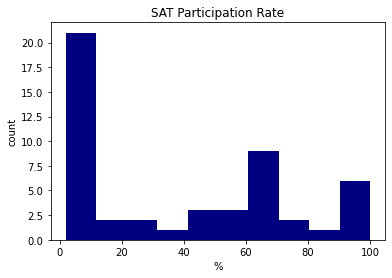

In [37]:
plt.title('SAT Participation Rate')
plt.hist(mergdf['participation_x'],color='navy'); # SAT hist
plt.ylabel('count')
plt.xlabel('%');

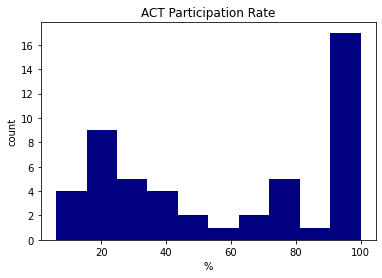

In [10]:
plt.title('ACT Participation Rate')
plt.hist(mergdf['participation_y'],color='navy'); #ACT hist
plt.ylabel('count')
plt.xlabel('%');

In [54]:
part_over_100_act = mergdf[mergdf['participation_y'] >= 95]
s = part_over_100_act.sort_values('participation_y',ascending=False)

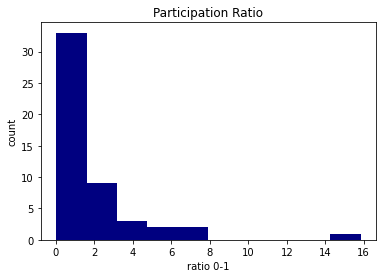

In [68]:
plt.title('Participation Ratio')
plt.hist(mergdf['part_ratio'],color='navy'); #ACT hist
plt.ylabel('count')
plt.xlabel('ratio 0-1');

In [72]:
mergdf['part_spread'] = abs(mergdf['participation_x'] - mergdf['participation_y'])


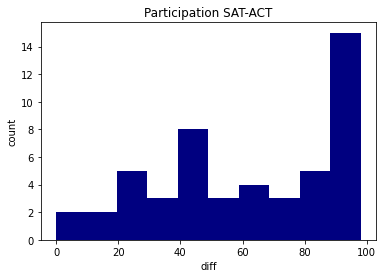

In [75]:
plt.title('Participation SAT-ACT')
plt.hist(mergdf['part_spread'],color='navy'); #ACT hist
plt.ylabel('count')
plt.xlabel('diff');

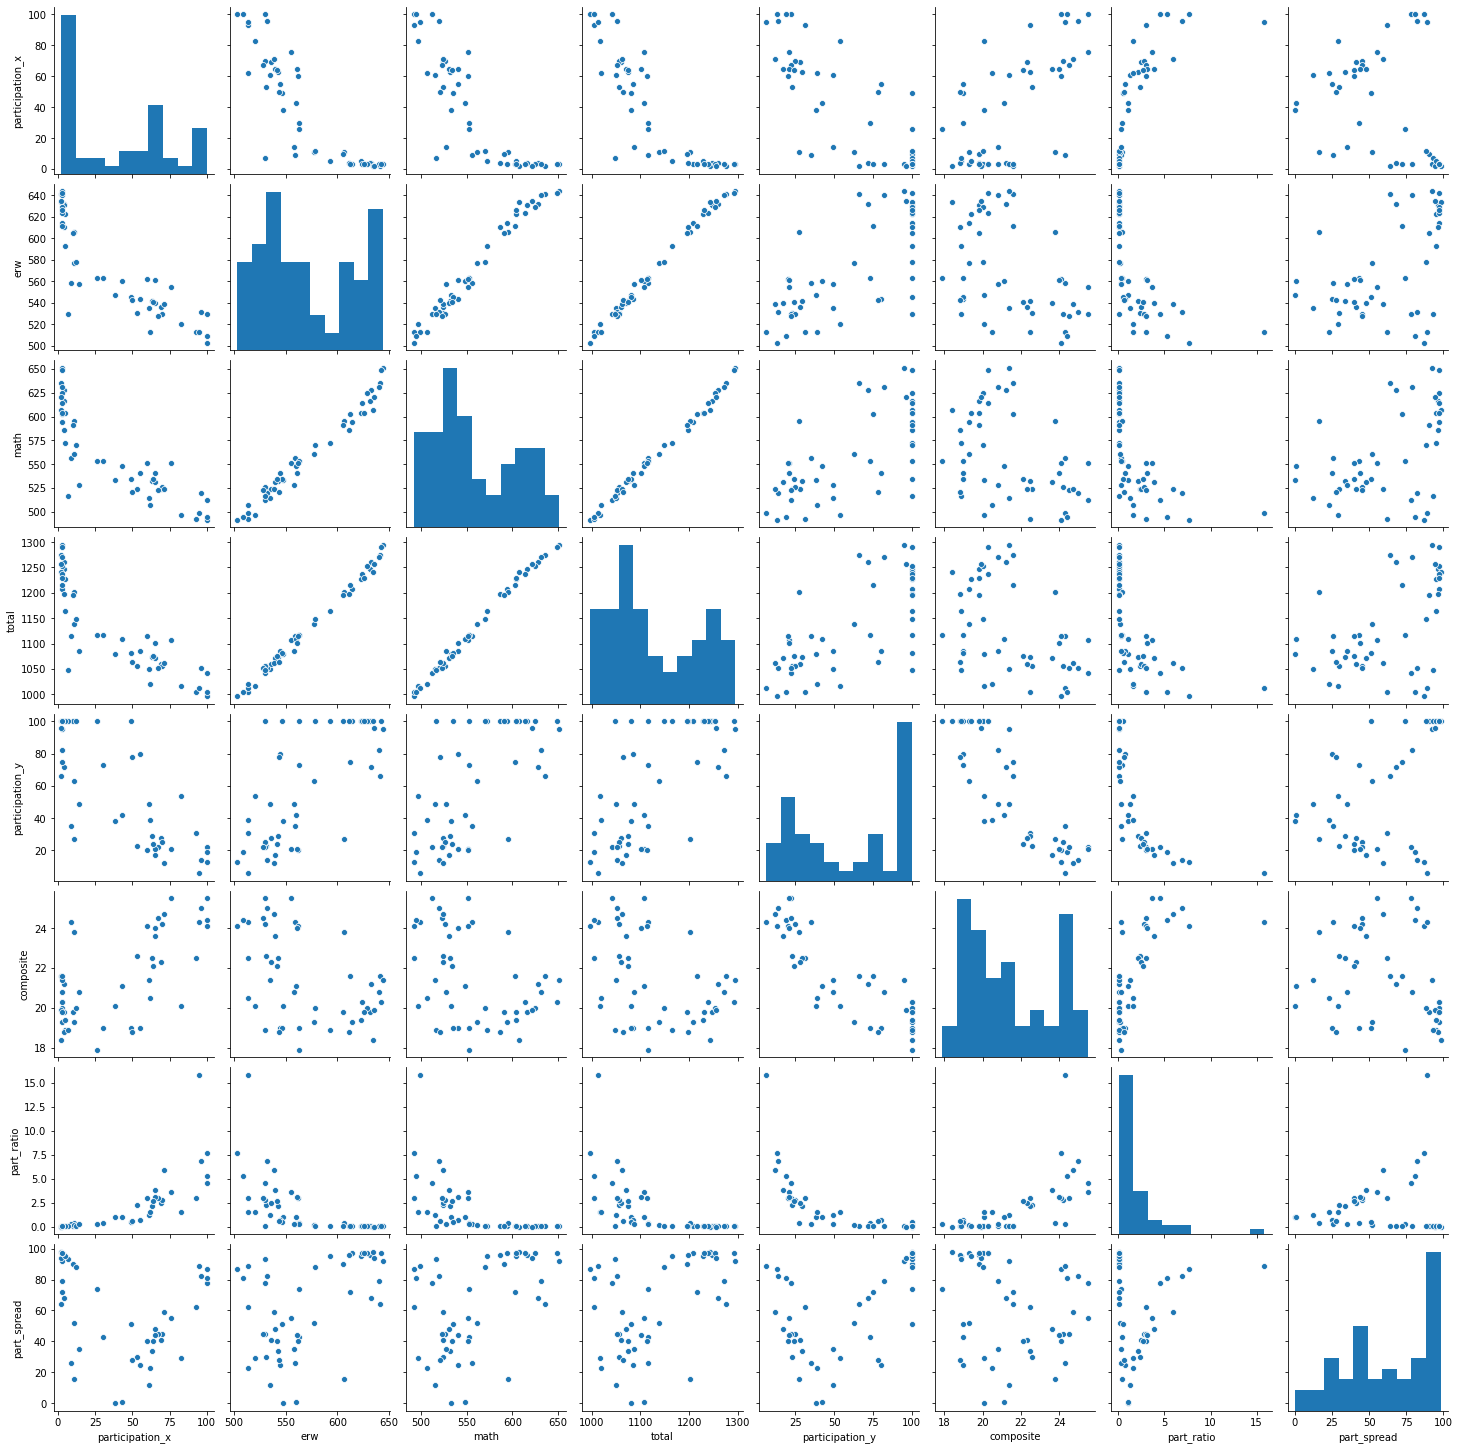

In [116]:
#scatter plot matrix https://seaborn.pydata.org/examples/scatterplot_matrix.html

sns.pairplot(mergdf)

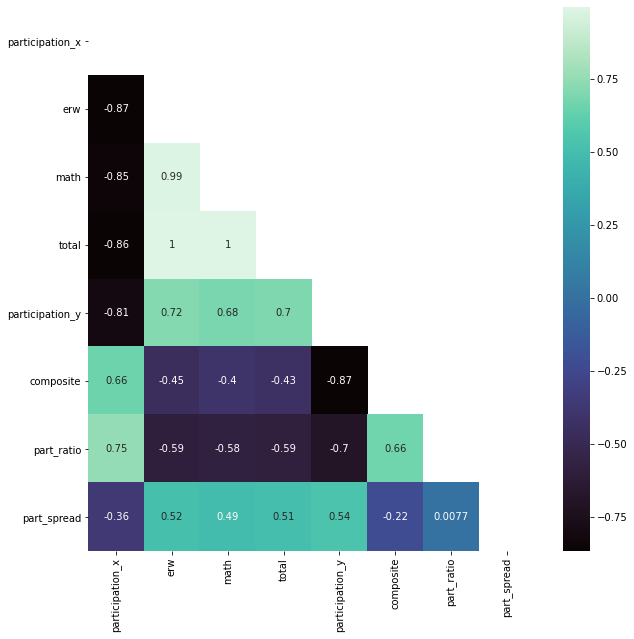

In [106]:
#Noelle's lab review

plt.figure(figsize = (10,10))
# Get correlation of variables.
corr = mergdf.corr()  #compares every single pair of varibles in the df

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr,mask = mask, cmap = 'mako',annot = True);


In [1]:
print(mergdf.shape)

NameError: name 'mergdf' is not defined

In [33]:
# SAT greater than 95%
part_over_100_sat = mergdf[mergdf['participation_x'] >= 95]
part_over_100_sat.sort_values('participation_x',ascending=False)

,state,participation_x,erw,math,total,participation_y,composite,part_ratio
6,Connecticut,100.0,530,512,1041,22.0,25.5,4.545455
7,Delaware,100.0,503,492,996,13.0,24.1,7.692308
21,Michigan,100.0,509,495,1005,19.0,24.4,5.263158
28,New Hampshire,96.0,532,520,1052,14.0,25.0,6.857143
18,Maine,95.0,513,499,1012,6.0,24.3,15.833333


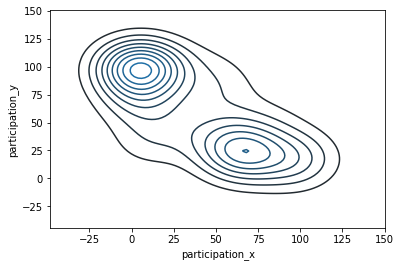

In [114]:
# makes sense as std for SAT/ACT is almost equal while skewness if opposite
sns.kdeplot(mergdf['participation_x'],mergdf['participation_y'])


In [62]:
# ACT greater than 95%
part_act = mergdf[mergdf['participation_y'] >= 95]
p = part_act.sort_values('participation_y',ascending=False)

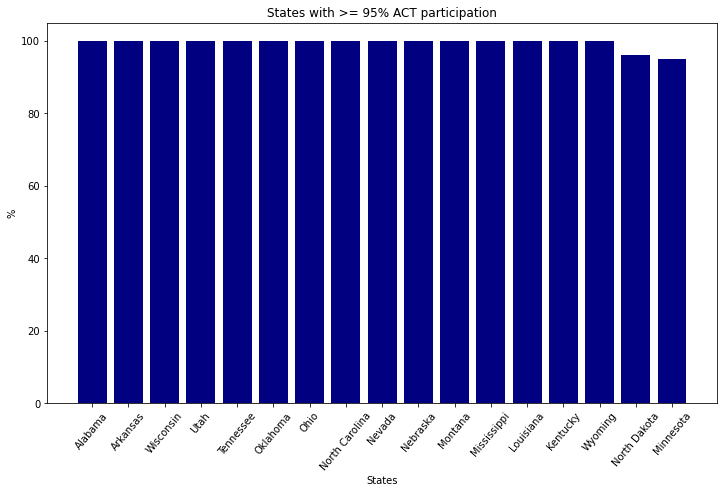

In [88]:
# Makes sense given these states ex dc require ACT

art_act = mergdf[mergdf['participation_y'] >= 95]
p = part_act.sort_values('participation_y',ascending=False)

plt.figure(figsize = (12,7))
plt.bar(p['state'],p['participation_y'],color='navy')
plt.xticks(rotation = 50)

# title,x and y labels
plt.title('States with >= 95% ACT participation')
plt.xlabel('States')
plt.ylabel('%');

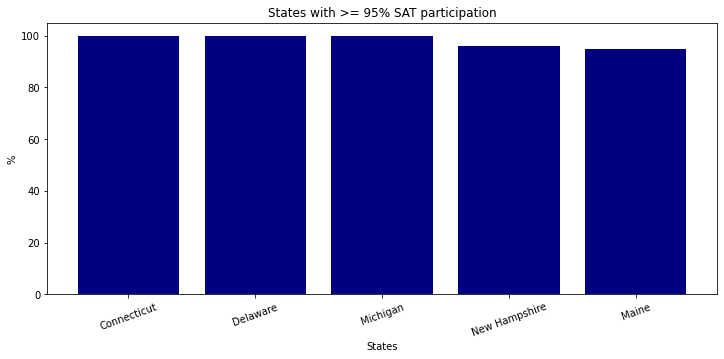

In [87]:
# Makes sense given these states ex dc require SAT

part_sat = mergdf[mergdf['participation_x'] >= 95]
a = part_sat.sort_values('participation_x',ascending=False)

plt.figure(figsize = (12,5))
plt.bar(a['state'],a['participation_x'],color='navy')
plt.xticks(rotation = 20)

# title,x and y labels
plt.title('States with >= 95% SAT participation')
plt.xlabel('States')
plt.ylabel('%');

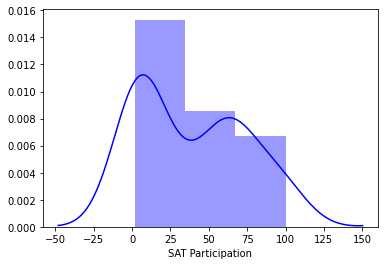

In [99]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
#positive skew
sns.distplot(mergdf['participation_x'],color='blue',axlabel='SAT Participation');


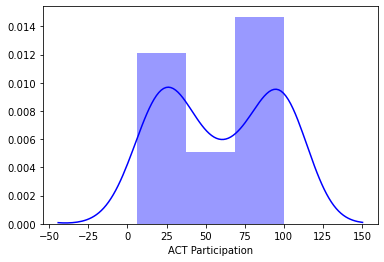

In [100]:
#more uniform dis
sns.distplot(mergdf['participation_y'],color='blue',axlabel='ACT Participation');

## Conclusions and Recommendations

Recommend to dig more into the political associations between parties and SAT/ACT
Data from the Federal Election Commission show that College Board executives have an overwhelming preference for Democratic candidates. The College Board also spends hundreds of thousands of dollars on lobbying, according to the Center for Responsive Politics.

Maybe it’s just a coincidence that states that tend to sway liberal prefer SAT and the data points to a clear preferance for coastal states?